In [1]:
from   datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
sp = pd.read_csv('../data/sp1950.csv')
sp = sp[['Date', 'Open', 'Close', 'Adj Close']]
sp = sp.rename(columns={'Adj Close': 'Value'})
sp.tail()

,Date,Open,Close,Value
17558,10/14/19,2861.280029,2966.15,2966.15
17559,10/15/19,2861.280029,2995.68,2995.68
17560,10/16/19,2861.280029,2989.69,2989.69
17561,10/17/19,2861.280029,2997.95,2997.95
17562,10/18/19,2861.280029,2986.20,2986.20


In [3]:
def date2datetime(date):
    month, day, year = date.split('/')
    if int(year) > 20:
        year = int(year) + 1900
    else:
        year = int(year) + 2000
    try:
        return pd.to_datetime(f'{year}-{month}-{day}')
    except:
        print(date)

In [4]:
sp.Date = sp.Date.apply(date2datetime)
sp['ChangeSinceOpen'] = sp['Close'] / sp['Open']
sp['DailyChange'] = np.nan
sp['OvernightChange'] = np.nan
for day in range(1, sp.shape[0]):
    sp.loc[day, 'DailyChange'] = (sp.loc[day, 'Value'] 
                                  / sp.loc[day - 1, 'Value'])
    sp.loc[day, 'OvernightChange'] = (sp.loc[day, 'Open'] 
                                      / sp.loc[day - 1, 'Close'])
sp.tail()     

,Date,Open,Close,Value,ChangeSinceOpen,DailyChange,OvernightChange
17558,2019-10-14,2861.280029,2966.15,2966.15,1.036651,0.998613,0.963306
17559,2019-10-15,2861.280029,2995.68,2995.68,1.046972,1.009956,0.964644
17560,2019-10-16,2861.280029,2989.69,2989.69,1.044879,0.998000,0.955135
17561,2019-10-17,2861.280029,2997.95,2997.95,1.047765,1.002763,0.957049
17562,2019-10-18,2861.280029,2986.20,2986.20,1.043659,0.996081,0.954412


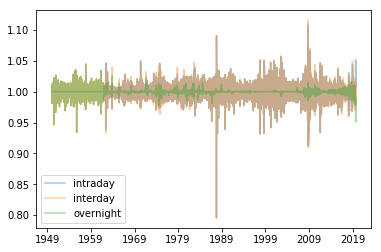

In [5]:
plt.plot(sp.Date, sp.ChangeSinceOpen, alpha=0.4, label='intraday')
plt.plot(sp.Date, sp.DailyChange, alpha=0.4, label='interday')
plt.plot(sp.Date, sp.OvernightChange, alpha=0.4, label='overnight')
plt.legend();

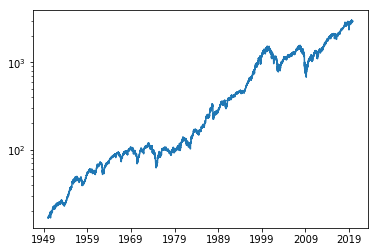

In [6]:
plt.plot(sp.Date, sp.Value);
plt.yscale('log');

In [7]:
sp.head()

,Date,Open,Close,Value,ChangeSinceOpen,DailyChange,OvernightChange
0,1950-01-03,16.66,16.66,16.66,1.0,NaN,NaN
1,1950-01-04,16.85,16.85,16.85,1.0,1.011405,1.011405
2,1950-01-05,16.93,16.93,16.93,1.0,1.004748,1.004748
3,1950-01-06,16.98,16.98,16.98,1.0,1.002953,1.002953
4,1950-01-09,17.08,17.08,17.08,1.0,1.005889,1.005889


In [8]:
START_DATE = pd.to_datetime('1962-01-01')
END_DATE = pd.to_datetime(datetime.now())
END_DATE

Timestamp('2019-10-20 00:28:08.248432')

In [9]:
PERIODS = [15, 30, 60, 125, 250]

In [28]:
N_BINS = 4
QS = np.linspace(0, 1, N_BINS + 1)
QS

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [29]:
def get_n_day_change(sp, n):
    return sp.Value / sp.Value.shift(periods=n)

In [30]:
for i in PERIODS:
    sp[f'change_{i}_day'] = get_n_day_change(sp, i)
sp.head()

,Date,Value,DailyChange,change_15_day,change_30_day,change_60_day,change_125_day,change_250_day,bin_15_day,bin_30_day,bin_60_day,bin_125_day,bin_250_day,cat
0,1962-01-02,70.959999,0.991754,NaN,NaN,NaN,NaN,NaN,D,D,B,B,A,DDBBA
1,1962-01-03,71.129997,1.002396,NaN,NaN,NaN,NaN,NaN,D,D,B,B,A,DDBBA
2,1962-01-04,70.639999,0.993111,NaN,NaN,NaN,NaN,NaN,E,D,B,B,B,EDBBB
3,1962-01-05,69.660004,0.986127,NaN,NaN,NaN,NaN,NaN,E,E,A,C,B,EEACB
4,1962-01-08,69.120003,0.992248,NaN,NaN,NaN,NaN,NaN,E,E,A,C,B,EEACB


In [31]:
for i in PERIODS:
    sp[f'bin_{i}_day'] = pd.qcut(sp[f'change_{i}_day'], q=QS)
    
sp.head()

,Date,Value,DailyChange,change_15_day,change_30_day,change_60_day,change_125_day,change_250_day,bin_15_day,bin_30_day,bin_60_day,bin_125_day,bin_250_day,cat
0,1962-01-02,70.959999,0.991754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDBBA
1,1962-01-03,71.129997,1.002396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDBBA
2,1962-01-04,70.639999,0.993111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EDBBB
3,1962-01-05,69.660004,0.986127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EEACB
4,1962-01-08,69.120003,0.992248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EEACB


In [32]:
sp.dropna(inplace=True)
sp.index = range(sp.shape[0])
sp.head()

,Date,Value,DailyChange,change_15_day,change_30_day,change_60_day,change_125_day,change_250_day,bin_15_day,bin_30_day,bin_60_day,bin_125_day,bin_250_day,cat
0,1962-12-28,62.959999,1.000477,1.000477,1.046543,1.122282,1.149954,0.887260,"(0.986, 1.007]","(1.04, 1.274]","(1.062, 1.389]","(1.102, 1.483]","(0.511, 0.996]",CACAE
1,1962-12-31,63.099998,1.002224,1.000634,1.052193,1.123575,1.129610,0.887108,"(0.986, 1.007]","(1.04, 1.274]","(1.062, 1.389]","(1.102, 1.483]","(0.511, 0.996]",CBCAE
2,1963-01-02,62.689999,0.993502,1.006745,1.042055,1.105644,1.109754,0.887458,"(0.986, 1.007]","(1.04, 1.274]","(1.062, 1.389]","(1.102, 1.483]","(0.511, 0.996]",CACBE
3,1963-01-03,63.720001,1.016430,1.022465,1.065196,1.116524,1.121634,0.914729,"(1.007, 1.026]","(1.04, 1.274]","(1.062, 1.389]","(1.102, 1.483]","(0.511, 0.996]",BBCBE
4,1963-01-04,64.129997,1.006434,1.023950,1.060877,1.123708,1.141713,0.927807,"(1.007, 1.026]","(1.04, 1.274]","(1.062, 1.389]","(1.102, 1.483]","(0.511, 0.996]",BBCAE


In [33]:
def bin2cat(series, vals=None):
    vals = vals or list(series.unique())
    n = len(vals)
    cats = list('ABCDEFGHIJ')[:n]
    return series.apply(lambda x: cats[vals.index(x)]), vals

In [34]:
bin_vals = {}

for i in PERIODS:
    ser = f'bin_{i}_day'
    sp[ser], vals = bin2cat(sp[ser])
    bin_vals[i] = vals 
sp.head()

,Date,Value,DailyChange,change_15_day,change_30_day,change_60_day,change_125_day,change_250_day,bin_15_day,bin_30_day,bin_60_day,bin_125_day,bin_250_day,cat
0,1962-12-28,62.959999,1.000477,1.000477,1.046543,1.122282,1.149954,0.887260,A,A,A,A,A,CACAE
1,1962-12-31,63.099998,1.002224,1.000634,1.052193,1.123575,1.129610,0.887108,A,A,A,A,A,CBCAE
2,1963-01-02,62.689999,0.993502,1.006745,1.042055,1.105644,1.109754,0.887458,A,A,A,A,A,CACBE
3,1963-01-03,63.720001,1.016430,1.022465,1.065196,1.116524,1.121634,0.914729,B,A,A,A,A,BBCBE
4,1963-01-04,64.129997,1.006434,1.023950,1.060877,1.123708,1.141713,0.927807,B,A,A,A,A,BBCAE


In [35]:
sp['cat'] = sp[[f'bin_{i}_day' for i in PERIODS]].sum(axis=1)
sp.head()

,Date,Value,DailyChange,change_15_day,change_30_day,change_60_day,change_125_day,change_250_day,bin_15_day,bin_30_day,bin_60_day,bin_125_day,bin_250_day,cat
0,1962-12-28,62.959999,1.000477,1.000477,1.046543,1.122282,1.149954,0.887260,A,A,A,A,A,AAAAA
1,1962-12-31,63.099998,1.002224,1.000634,1.052193,1.123575,1.129610,0.887108,A,A,A,A,A,AAAAA
2,1963-01-02,62.689999,0.993502,1.006745,1.042055,1.105644,1.109754,0.887458,A,A,A,A,A,AAAAA
3,1963-01-03,63.720001,1.016430,1.022465,1.065196,1.116524,1.121634,0.914729,B,A,A,A,A,BAAAA
4,1963-01-04,64.129997,1.006434,1.023950,1.060877,1.123708,1.141713,0.927807,B,A,A,A,A,BAAAA


In [36]:
sp = sp.loc[sp.Date >= START_DATE, :]
sp.index = range(sp.shape[0])
sp.head()

,Date,Value,DailyChange,change_15_day,change_30_day,change_60_day,change_125_day,change_250_day,bin_15_day,bin_30_day,bin_60_day,bin_125_day,bin_250_day,cat
0,1962-12-28,62.959999,1.000477,1.000477,1.046543,1.122282,1.149954,0.887260,A,A,A,A,A,AAAAA
1,1962-12-31,63.099998,1.002224,1.000634,1.052193,1.123575,1.129610,0.887108,A,A,A,A,A,AAAAA
2,1963-01-02,62.689999,0.993502,1.006745,1.042055,1.105644,1.109754,0.887458,A,A,A,A,A,AAAAA
3,1963-01-03,63.720001,1.016430,1.022465,1.065196,1.116524,1.121634,0.914729,B,A,A,A,A,BAAAA
4,1963-01-04,64.129997,1.006434,1.023950,1.060877,1.123708,1.141713,0.927807,B,A,A,A,A,BAAAA


In [37]:
sp.drop(['Open', 'Close', 'ChangeSinceOpen', 'OvernightChange'], axis=1, inplace=True)
sp.tail()

ValueError: labels ['Open' 'Close' 'ChangeSinceOpen' 'OvernightChange'] not contained in axis

In [38]:
#sp.cat.value_counts()

In [39]:
def sim_next_value(df, bin_vals):
    last_i = df.index.max()
    cat = df.loc[last_i, 'cat']
    idxs = np.where(df.cat == cat)[0] + 1
    idx = np.random.choice([i for i in idxs if i != (last_i + 1)], 1)
    change = df.loc[idx, 'DailyChange']
    last_row = df.loc[last_i, :]
    date = last_row.Date + pd.DateOffset(1)
    value = last_row.Value * change
    out = {}
    n = len(list(bin_vals.values())[0])
    cats = list('ABCDEFGHIJ')[:n]
    for p in PERIODS:
        out[f'change_{p}_day'] = list(value / df.loc[last_i - p + 1, 'Value'])[0]
        interval = [i for i in bin_vals[p] if list(change)[0] in i]
        out[f'bin_{p}_day'] = cats[bin_vals[p].index(interval[0])]
    out['Date'] = last_row.Date + pd.DateOffset(1)
    if out['Date'].weekday() == 5:
        out['Date'] = last_row.Date + pd.DateOffset(2)
    if out['Date'].weekday() == 6:
        out['Date'] = last_row.Date + pd.DateOffset(3)  
    out['Value'] = value
    out['DailyChange'] = change
    cat = ''
    for p in PERIODS:
        cat += out[f'bin_{p}_day']
    out['cat'] = cat
    row = pd.DataFrame(out)
    df = df.append(row)
    df.index = range(df.shape[0])
    return df

In [40]:
test = sim_next_value(sp.copy(), bin_vals)
test.tail()

,DailyChange,Date,Value,bin_125_day,bin_15_day,bin_250_day,bin_30_day,bin_60_day,cat,change_125_day,change_15_day,change_250_day,change_30_day,change_60_day
14296,1.009956,2019-10-15,2995.680000,C,B,B,B,C,BBCCB,1.032833,1.009802,1.066109,1.030765,1.003568
14297,0.998000,2019-10-16,2989.690000,C,A,B,B,C,ABCCB,1.029143,1.001615,1.064246,1.017670,0.994750
14298,1.002763,2019-10-17,2997.950000,C,A,B,C,C,ACCCB,1.030943,1.006828,1.082769,1.007376,0.992843
14299,0.996081,2019-10-18,2986.200000,C,B,B,C,C,BCCCB,1.017902,1.008242,1.078915,1.002515,0.994184
14300,0.999236,2019-10-21,2983.917168,C,A,B,C,C,ACCCB,1.019358,1.002411,1.082746,1.001842,0.986139


In [41]:
def forecast(n_days, df, bin_vals):
    for i in range(n_days):
        df = sim_next_value(df, bin_vals)
    return df

In [42]:
test = forecast(250, sp.copy(), bin_vals)

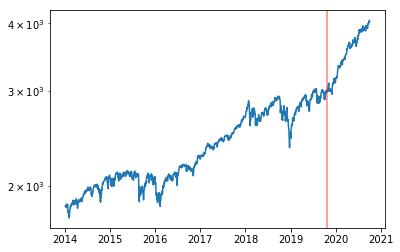

In [43]:
END_DATE
plt.plot(test.Date[test.Date > pd.to_datetime('2014-01-01')], test.Value[test.Date > pd.to_datetime('2014-01-01')])
plt.yscale('log');
plt.axvline(END_DATE, c='r', alpha=0.5);

In [44]:
def run_sim(df, bin_vals, n_days=250, iters=1000):
    for i in range(iters):
        print('\rSimulation:', i, end='')
        if i == 0:
            out = forecast(n_days, df, bin_vals)
            out = out.loc[out.Date >= END_DATE, ['Date', 'Value']]
            out.rename(columns={'Value': 'Value0'}, inplace=True)
        else:
            next_sim = forecast(n_days, df, bin_vals)
            out[f'Value{i}'] = next_sim.Value
    return out

In [45]:
ITERS = 500
sim = run_sim(sp.copy(), bin_vals, iters=ITERS)

Simulation: 499

In [51]:
today_value = 2986.20

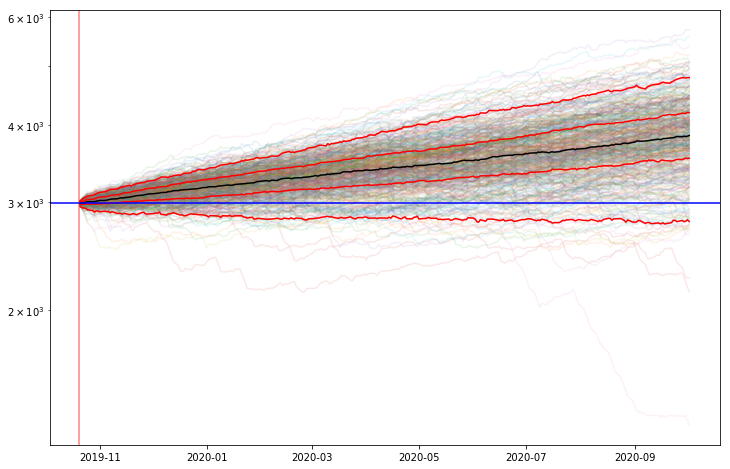

In [52]:
plt.figure(figsize=[12, 8])
for i in range(ITERS):
    plt.plot(sim.Date, sim[f'Value{i}'], alpha=0.1);
for q in [0.025, 0.25, 0.5, 0.75, 0.957]:
    col = 'k-' if q == 0.5 else 'r-'
    quant = sim[[c for c in list(sim) if c.startswith('Value')]].quantile(q=q, axis=1)
    plt.plot(sim.Date, quant, col)
plt.yscale('log');
plt.axvline(END_DATE, c='r', alpha=0.5);
plt.axhline(today_value, c='blue');

In [53]:
sim.head(7)

,Date,Value0,Value1,Value2,Value3,Value4,Value5,Value6,Value7,Value8,...,Value490,Value491,Value492,Value493,Value494,Value495,Value496,Value497,Value498,Value499
14300,2019-10-21,3005.294727,2953.742908,2983.154374,2977.967385,2989.661344,2953.742908,3010.344746,3010.960882,2966.216895,...,2978.171687,3000.103569,3010.344746,3000.667531,2978.719319,2994.048779,3007.440875,2981.721768,3006.890503,3005.294727
14301,2019-10-22,3005.368965,2933.253429,2988.946304,2977.967385,2996.834236,2975.943626,2990.145682,3031.318296,2983.445232,...,2960.958214,3018.017156,3029.593862,3011.891753,2994.363023,2973.107504,3008.024274,2986.905868,3006.637498,3005.041856
14302,2019-10-23,3042.593929,2972.453658,2996.516785,2984.121997,3004.822727,2983.765447,3006.564852,3040.932114,2976.863780,...,2969.616016,3035.103491,3031.345178,3025.468144,3008.108896,2977.623727,3021.583232,3027.815923,2977.902754,2990.959160
14303,2019-10-24,3049.953112,2965.473631,3031.513271,2958.389414,3048.485018,3009.711317,3003.062877,3048.330083,2997.559319,...,2952.781514,3049.884173,3057.704786,3039.403163,3004.320924,2992.295070,3006.609588,3048.006622,2995.198965,3030.930573
14304,2019-10-25,3055.979915,2971.745047,3043.688906,2967.658020,3048.120262,3015.909700,3010.902418,3056.287795,2991.706426,...,2957.266861,3044.576120,3072.518743,3033.457345,2997.534381,2998.207940,2985.753384,3056.131519,2996.036843,3017.325768
14305,2019-10-28,3053.733812,2976.911801,3057.408626,2981.753919,3034.327167,3010.020977,3018.126273,3064.840864,2989.507563,...,2948.473209,3088.816057,3074.274523,3029.637453,2995.176177,3017.391703,2990.233866,3063.625311,3001.853786,3041.406964
14306,2019-10-29,3052.089120,2975.750568,3065.558586,2976.005543,3013.278692,3003.398768,3036.157254,3078.489088,3002.784122,...,2964.626224,3062.687526,3079.983340,3023.796764,3002.520503,3024.836870,3008.088521,3062.563185,3003.519426,3063.040527


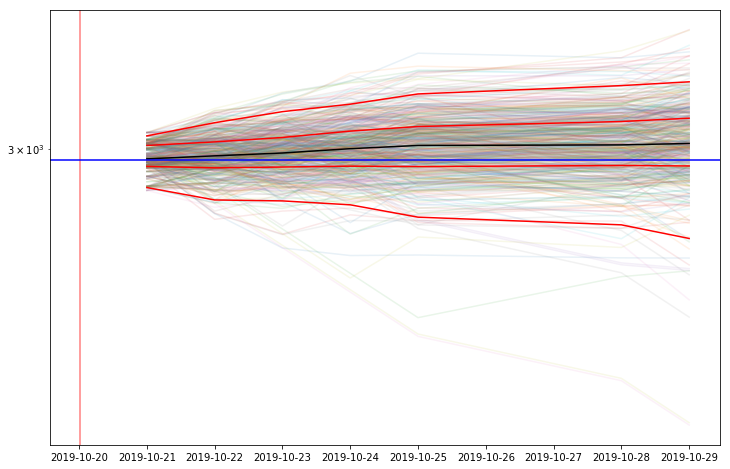

In [54]:
i = sim.index[:7]
sub = sim.loc[i, :]
plt.figure(figsize=[12, 8])
for i in range(ITERS):
    plt.plot(sub.Date, sub[f'Value{i}'], alpha=0.1);
for q in [0.025, 0.25, 0.5, 0.75, 0.957]:
    col = 'k-' if q == 0.5 else 'r-'
    quant = sub[[c for c in list(sub) if c.startswith('Value')]].quantile(q=q, axis=1)
    plt.plot(sub.Date, quant, col)
plt.yscale('log');
plt.axvline(END_DATE, c='r', alpha=0.5);
plt.axhline(today_value, c='blue');

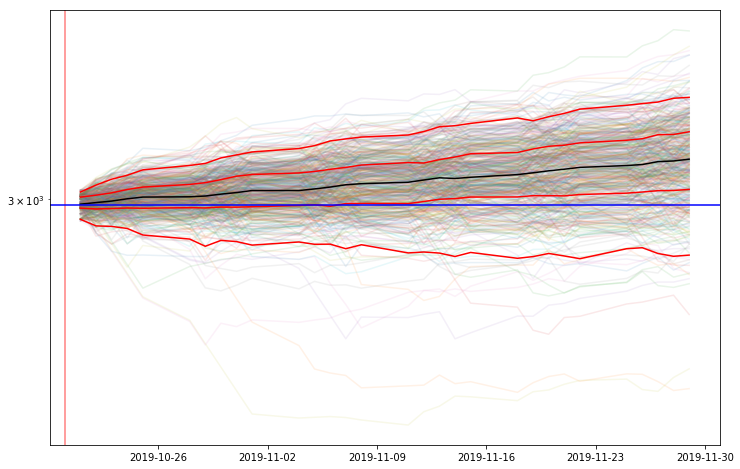

In [55]:
i = sim.index[:30]
sub = sim.loc[i, :]
plt.figure(figsize=[12, 8])
for i in range(ITERS):
    plt.plot(sub.Date, sub[f'Value{i}'], alpha=0.1);
for q in [0.025, 0.25, 0.5, 0.75, 0.957]:
    col = 'k-' if q == 0.5 else 'r-'
    quant = sub[[c for c in list(sub) if c.startswith('Value')]].quantile(q=q, axis=1)
    plt.plot(sub.Date, quant, col)
plt.yscale('log');
plt.axvline(END_DATE, c='r', alpha=0.5);
plt.axhline(today_value, c='blue');